In [1]:
# import torch
# saved_state = torch.load('models/eegnet_5fold_train6.pth')

In [2]:
# print(saved_state.keys())

In [3]:
import matplotlib.pyplot as plt
import mne
import warnings
import pandas as pd
import seaborn as sns


# Ignore RuntimeWarning
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [51]:
# file_path = 'eeg-data/sub-001/eeg/sub-001_task-eyesclosed_eeg.set'
file_path = 'model-data/train/sub-001_eeg_chunk_0.set'
raw = mne.io.read_raw_eeglab(file_path)
raw2 = mne.io.read_raw_eeglab(file_path)

In [52]:
raw2 = raw2.resample(95)

In [53]:
raw2.get_data().shape

(19, 1425)

In [34]:
raw.plot()

In [35]:
raw2.plot()

In [71]:
print(raw.info, raw2.info)

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 500.0 Hz
> <Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 47.5 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 95.0 Hz
>


In [54]:
print(len(raw), len(raw2))

7500 1425


In [55]:
print(raw.info['sfreq'], raw2.info['sfreq'])

500.0 95.0


In [68]:
raw.compute_psd().plot().savefig('data-imgs/original_psd.png')
raw2.compute_psd().plot().savefig('data-imgs/resampled_psd.png')

Effective window size : 4.096 (s)
Effective window size : 15.000 (s)


C:\ProgramData\miniconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
C:\ProgramData\miniconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


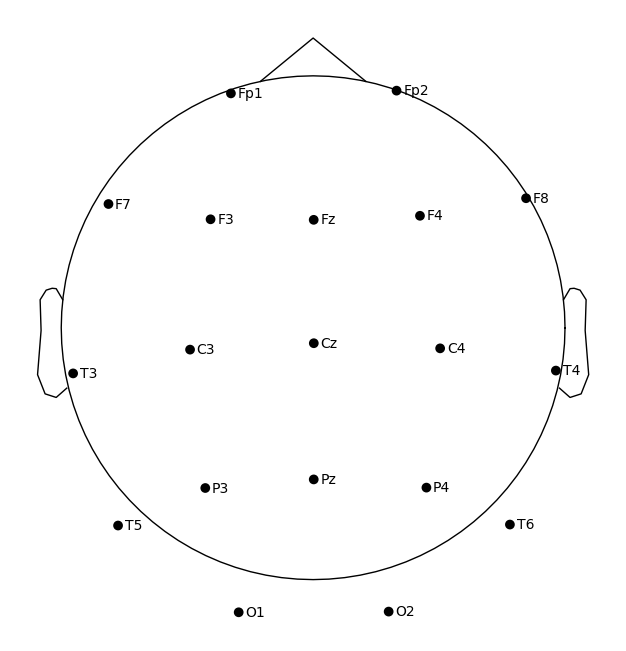

In [85]:
raw.plot_sensors(title = 'topomap', show_names = True).savefig('data-imgs/head-map.png')

Effective window size : 4.096 (s)


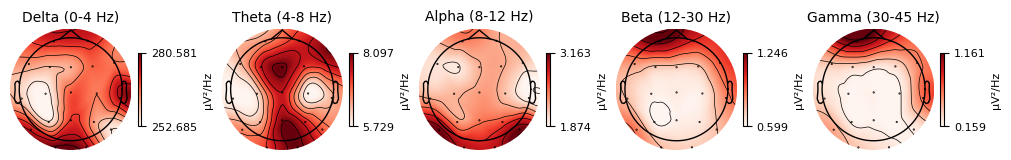

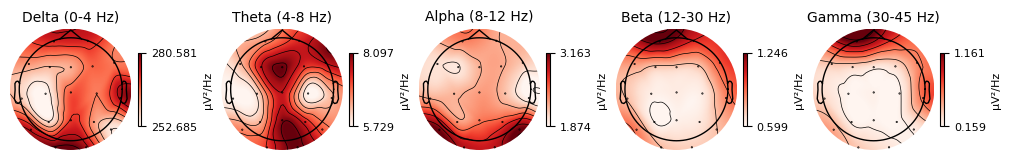

In [79]:
raw.compute_psd().plot_topomap()

Effective window size : 15.000 (s)


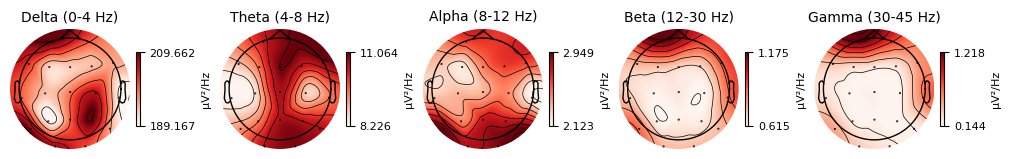

In [78]:
raw2.compute_psd().plot_topomap().savefig('data-imgs/sample_topomap.png')

In [15]:
tsv_path = 'model-data/participants.tsv'
participants = pd.read_csv(tsv_path, sep='\t')

In [16]:
participants.head()

,participant_id,Gender,Age,Group,MMSE
0,sub-001,F,57,A,16
1,sub-002,F,78,A,22
2,sub-003,M,70,A,14
3,sub-004,F,67,A,20
4,sub-005,M,70,A,22


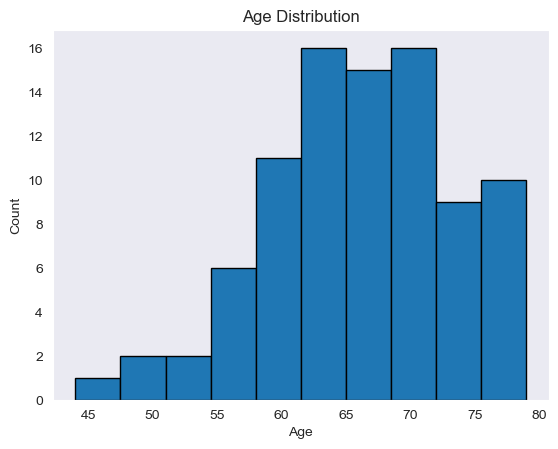

In [17]:
# Plot Age distribution in bins of 5
participants['Age'].hist(bins=10, edgecolor='black', grid=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('data-imgs/age_hist.png')

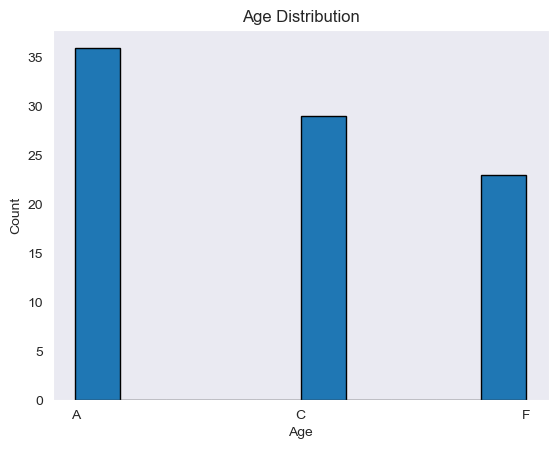

In [18]:
# Add Group distribution to the histogram along with Age
participants['Group'].hist(edgecolor='black', grid=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('data-imgs/age_group_hist.png')

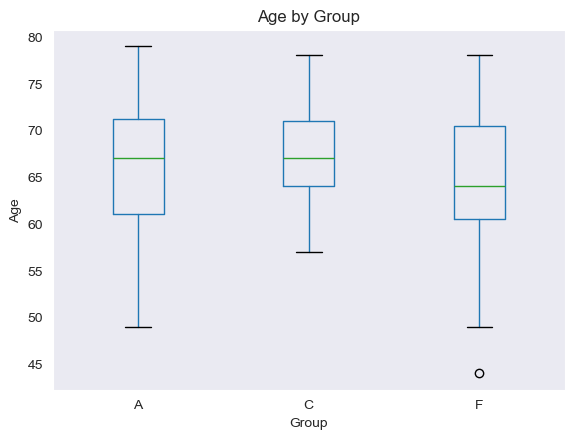

In [19]:
# Plot group by age
participants.boxplot(column='Age', by='Group', grid=False)
plt.title('Age by Group')
plt.suptitle('')
plt.xlabel('Group')
plt.ylabel('Age')
plt.savefig('data-imgs/age_by_group.png')

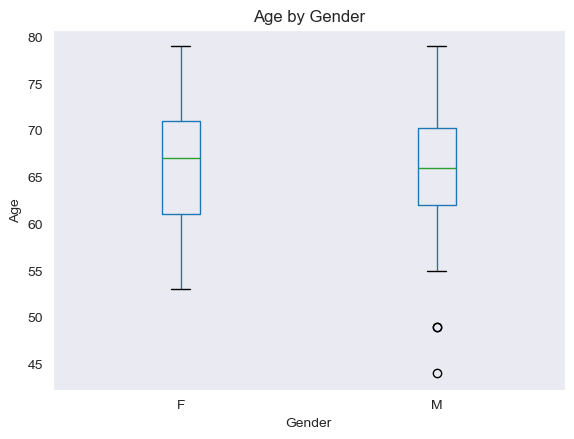

In [20]:
# Plot group by age
participants.boxplot(column='Age', by='Gender', grid=False)
plt.title('Age by Gender')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.savefig('data-imgs/age_by_gender.png')

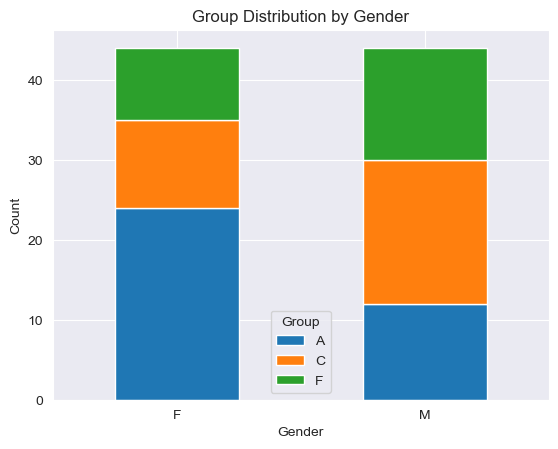

In [21]:
group_counts = participants.groupby(['Gender', 'Group']).size().unstack(fill_value=0)
group_counts.plot(kind='bar', stacked=True)
plt.title('Group Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Group')
plt.savefig('data-imgs/group-by-gender-hist.png')

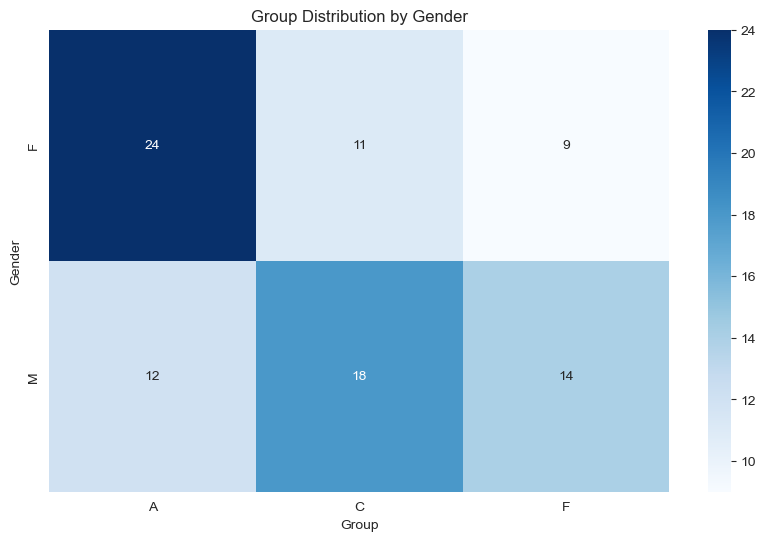

In [22]:
group_counts = participants.groupby(['Gender', 'Group']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(group_counts, annot=True, cmap='Blues', fmt='g')
plt.title('Group Distribution by Gender')
plt.xlabel('Group')
plt.ylabel('Gender')
plt.savefig('data-imgs/group-by-gender-heatmap.png')

In [23]:
group_counts = participants.groupby(['Age', 'Group']).size().unstack(fill_value=0)
group_counts

Group,A,C,F
Age,,,
44,0,0,1
49,1,0,1
53,1,0,1
55,0,0,1
56,1,0,0
57,2,1,1
58,1,0,0
59,1,0,0
60,1,0,1


C:\Users\leofi\AppData\Local\Temp\ipykernel_7796\2662082249.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = participants.groupby(['Age_Group', 'Group']).size().unstack(fill_value=0)


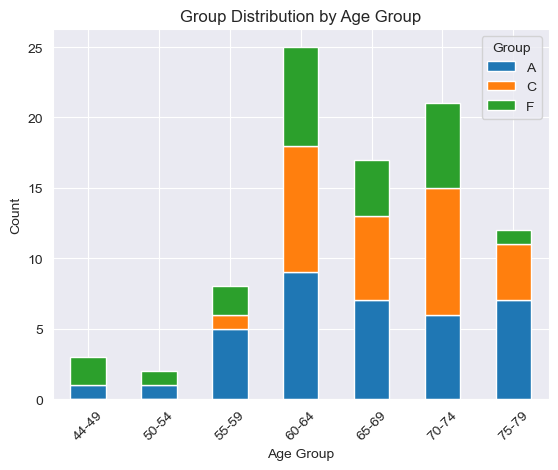

In [26]:
# Define the age bins
age_bins = [43, 49, 54, 59, 64, 69, 74, 79]
age_labels = ['44-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79']
participants['Age_Group'] = pd.cut(participants['Age'], bins=age_bins, labels=age_labels)
group_counts = participants.groupby(['Age_Group', 'Group']).size().unstack(fill_value=0)

group_counts.plot(kind='bar', stacked=True)
plt.title('Group Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.savefig('data-imgs/group-by-age-hist.png')

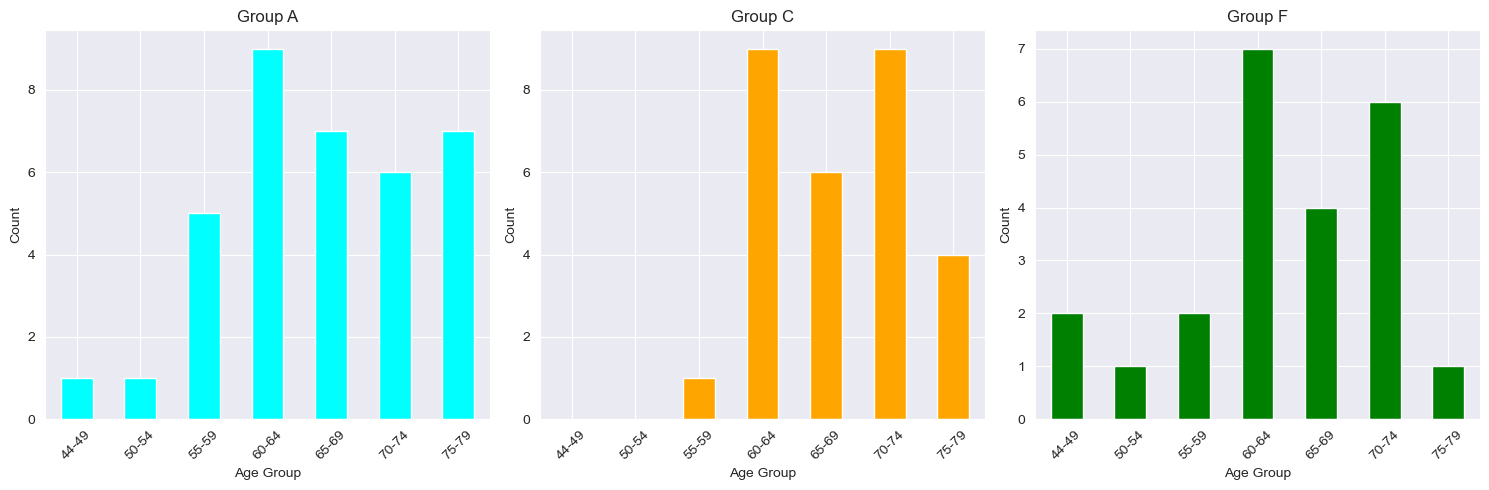

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot histogram for Group A
group_counts['A'].plot(kind='bar', color='cyan', ax=axs[0])
axs[0].set_title('Group A')
axs[0].set_xlabel('Age Group')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Plot histogram for Group C
group_counts['C'].plot(kind='bar', color='orange', ax=axs[1])
axs[1].set_title('Group C')
axs[1].set_xlabel('Age Group')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)

# Plot histogram for Group F
group_counts['F'].plot(kind='bar', color='green', ax=axs[2])
axs[2].set_title('Group F')
axs[2].set_xlabel('Age Group')
axs[2].set_ylabel('Count')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('data-imgs/group-by-age-hist-combined.png')

In [27]:
groupg_counts = participants.groupby(['Age', 'Gender']).size().unstack(fill_value=0)
groupg_counts

Gender,F,M
Age,,
44,0,1
49,0,2
53,2,0
55,0,1
56,1,0
57,3,1
58,1,0
59,1,0
60,1,1


C:\Users\leofi\AppData\Local\Temp\ipykernel_7796\1796009964.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupg_counts = participants.groupby(['Age_Group', 'Gender']).size().unstack(fill_value=0)


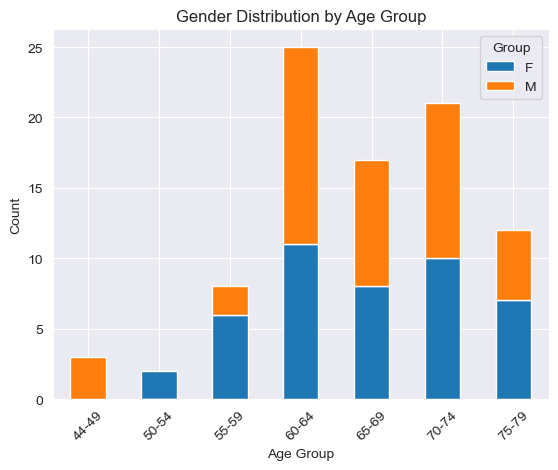

In [39]:
# Define the age bins
age_bins = [43, 49, 54, 59, 64, 69, 74, 79]
age_labels = ['44-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79']
participants['Age_Group'] = pd.cut(participants['Age'], bins=age_bins, labels=age_labels)
groupg_counts = participants.groupby(['Age_Group', 'Gender']).size().unstack(fill_value=0)

groupg_counts.plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.savefig('data-imgs/gender-by-age-hist.png')

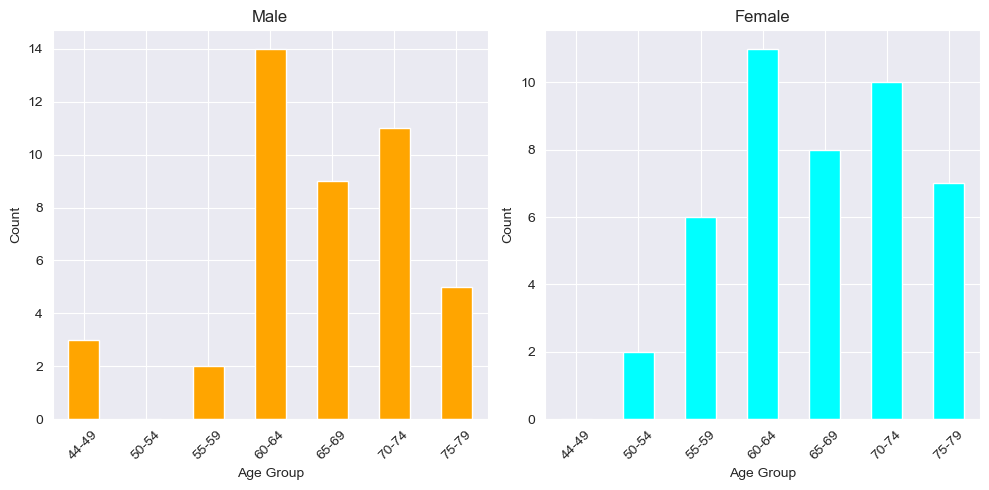

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram for Male
groupg_counts['M'].plot(kind='bar', color='orange', ax=axs[0])
axs[0].set_title('Male')
axs[0].set_xlabel('Age Group')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Plot histogram for Female
groupg_counts['F'].plot(kind='bar', color='cyan', ax=axs[1])
axs[1].set_title('Female')
axs[1].set_xlabel('Age Group')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('data-imgs/gender-by-age-hist-combined.png')